In [1]:
import pandas as pd
import re

f = open('Web_access_log-akumenius.com.txt')
dades=f.readlines()

print(dades[261748])

df=pd.DataFrame(dades)
print(df.columns)
print(df.head())
print(df.shape)
print(df.ndim)
print(df.columns)
print(df.dtypes)

www.akumenius.com 79.155.78.117 - - [02/Mar/2014:02:30:22 +0100] "GET /modules/system/views/themes/bcoos/css/module.css HTTP/1.1" 200 540 "http://www.akumenius.com/destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-Phuket_TAILANDIA-con-Windsurf" "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.117 Safari/537.36" VLOG=-

RangeIndex(start=0, stop=1, step=1)
                                                   0
0  localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1  localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2  localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3  localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4  localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
(261873, 1)
2
RangeIndex(start=0, stop=1, step=1)
0    object
dtype: object


### Exercici 1 i 2

In [2]:
df=pd.DataFrame(dades)
print(df.head(3))

df[['A', 'B']] = df[0].str.split(' - ', 1, expand=True)
df[['web', 'ip']] = df['A'].str.split(' ',1, expand=True)
df[['clarcat','B2']]=df['B'].str.split(' ',1,expand=True)
df[['data','C']] = df['B2'].str.split(' ',1, expand=True)

df2=df['C'].str.split(' "|" ',expand=True)
df2['web']=df['web']
df2['ip']=df['ip']
df2['clarcat']=df['clarcat']
df2[['fecha','hora']]=df['data'].str.split(':',1,expand=True)
df2['fecha']=df2['fecha'].str.replace('[','')
df2[0]=df2[0].str.replace(']','')
df2.rename(columns={0: 'GMT', 1:'GET', 2:'numeros', 3:'direccio', 4: 'navegador',5:'VLOG'}, inplace=True)
df2['numeros']=df2['numeros'].str.replace(' - ','')
df2['numeros']=df2['numeros'].str.replace(' -','')
df2['navegador']=df2['navegador'].str.replace('"','')
df2['GMT']=df2['GMT'].str.replace(' ','')
df2['count']=1

df2=df2[['web','ip','clarcat','fecha','hora','GMT','GET','numeros','direccio','navegador','VLOG','count']]


print(df2.head())

                                                   0
0  localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1  localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2  localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
         web         ip clarcat        fecha      hora    GMT  \
0  localhost  127.0.0.1       -  23/Feb/2014  03:10:31  +0100   
1  localhost  127.0.0.1       -  23/Feb/2014  03:10:31  +0100   
2  localhost  127.0.0.1       -  23/Feb/2014  03:10:31  +0100   
3  localhost  127.0.0.1       -  23/Feb/2014  03:10:31  +0100   
4  localhost  127.0.0.1       -  23/Feb/2014  03:10:31  +0100   

                  GET numeros direccio                           navegador  \
0  OPTIONS * HTTP/1.0     200        -  Apache (internal dummy connection)   
1  OPTIONS * HTTP/1.0     200        -  Apache (internal dummy connection)   
2  OPTIONS * HTTP/1.0     200        -  Apache (internal dummy connection)   
3  OPTIONS * HTTP/1.0     200        -  Apache (internal dummy connection)   
4  OPTI

In [3]:
for i in df2:
    if i!= 'count':
        print(i)
        x=df2.groupby(i)['count'].sum().reset_index()
        print(x)

web
                  web   count
0       akumenius.com     742
1        akumenius.es      94
2           localhost   14127
3  test.akumenius.com   14610
4   www.akumenius.com  232300
ip
                   ip  count
0      101.199.108.59     32
1     101.226.167.226      1
2       107.178.37.48    194
3      107.178.38.221    176
4       107.21.14.116      2
...               ...    ...
2916    95.63.234.126    265
2917     95.63.60.249    154
2918    96.242.31.129     52
2919    98.137.206.41     11
2920    98.244.10.248     91

[2921 rows x 2 columns]
clarcat
   clarcat   count
0        -  261846
1  clarcat      27
fecha
         fecha  count
0  01/Mar/2014  17749
1  02/Mar/2014   1384
2  23/Feb/2014  40536
3  24/Feb/2014  48850
4  25/Feb/2014  55798
5  26/Feb/2014  36473
6  27/Feb/2014  41513
7  28/Feb/2014  19570
hora
           hora  count
0      00:00:00      2
1      00:00:01      4
2      00:00:02      3
3      00:00:03      4
4      00:00:04      2
...         ...    ...
66630

In [4]:
df2.drop('GMT', axis=1, inplace=True)
df2.drop('VLOG', axis=1, inplace=True)

In [5]:
print(df2.head())

         web         ip clarcat        fecha      hora                 GET  \
0  localhost  127.0.0.1       -  23/Feb/2014  03:10:31  OPTIONS * HTTP/1.0   
1  localhost  127.0.0.1       -  23/Feb/2014  03:10:31  OPTIONS * HTTP/1.0   
2  localhost  127.0.0.1       -  23/Feb/2014  03:10:31  OPTIONS * HTTP/1.0   
3  localhost  127.0.0.1       -  23/Feb/2014  03:10:31  OPTIONS * HTTP/1.0   
4  localhost  127.0.0.1       -  23/Feb/2014  03:10:31  OPTIONS * HTTP/1.0   

  numeros direccio                           navegador  count  
0     200        -  Apache (internal dummy connection)      1  
1     200        -  Apache (internal dummy connection)      1  
2     200        -  Apache (internal dummy connection)      1  
3     200        -  Apache (internal dummy connection)      1  
4     200        -  Apache (internal dummy connection)      1  


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ips = df2.groupby('ip')['count'].sum().reset_index()

print(ips['count'].max())

46382


    index               ip  count
0     103        127.0.0.1  13892
1     128    144.76.95.232    552
2     306  162.243.192.191   2927
3     402   176.31.255.177   1044
4     651    185.27.136.38    531
5     728    188.84.96.240    696
6     878    195.57.124.71    897
7     899  198.143.133.154   1045
8    1242    217.12.16.130    897
9    1252   217.125.71.222   5201
10   1439    37.14.223.169    533
11   1610   62.117.197.230   2567
12   1725    66.249.64.103    629
13   1728     66.249.64.13    661
14   1738     66.249.64.98    683
15   1751    66.249.75.148   3558
16   1765    66.249.76.216  46382
17   1798    66.249.93.141    782
18   1888    74.86.158.106    836
19   1889    74.86.158.107    810
20   1972    79.145.213.52    600
21   2065    80.28.221.123  14725
22   2093    80.35.176.249    945
23   2098     80.37.230.56    746
24   2102     80.39.210.69    633
25   2106     80.58.250.94   1043
26   2148     81.35.188.72    555
27   2158    81.39.110.171   1030
28   2398     

Text(0.5, 1.0, 'IPs amb més de 500 accessos a la web')

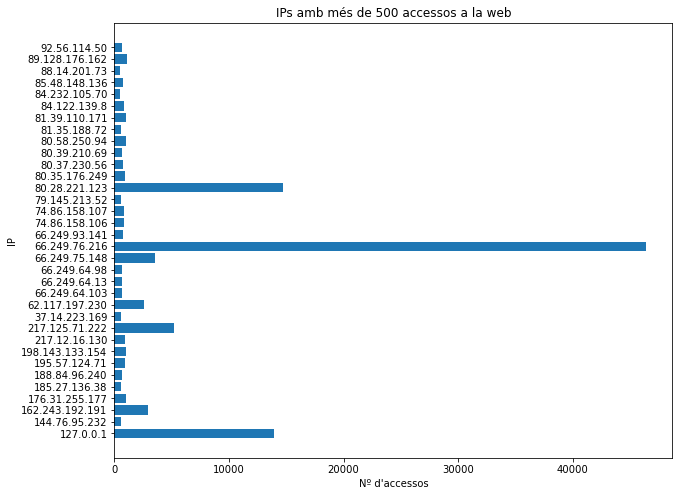

In [7]:
ips2=pd.DataFrame(ips.loc[(ips['count']>500)].reset_index())
print(ips2)
plt.rcParams["figure.figsize"] = (10,8)
plt.barh(ips2['ip'],ips2['count'])
plt.ylabel('IP')
plt.xlabel('Nº d\'accessos')
plt.title('IPs amb més de 500 accessos a la web', loc='center')

Text(0, 0.5, "Nº d'accessos")

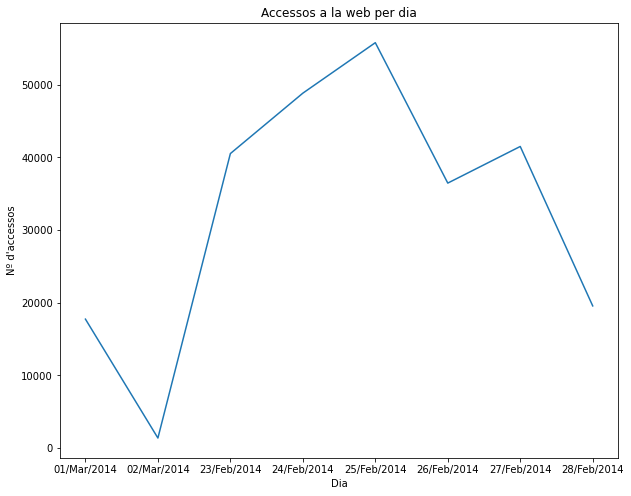

In [8]:
dies=df2.groupby('fecha')['count'].sum().reset_index()
plt.plot(dies['fecha'],dies['count'])
plt.title('Accessos a la web per dia')
plt.xlabel('Dia')
plt.ylabel('Nº d\'accessos')

### Exercici 3

In [9]:
from ip2geotools.databases.noncommercial import DbIpCity

In [10]:
#Geolocalització de les IPs amb més de 500 accessos a la web:
count=0

for j in ips2['ip'].to_list():
    response = DbIpCity.get(j, api_key='free')
    print(response.ip_address,response.city,response.region,response.country,response.latitude,response.longitude)
    ips2.loc[count,'ciutat']=response.city
    ips2.loc[count,'regio']=response.region
    ips2.loc[count,'pais']=response.country
    ips2.loc[count,'latitud']=response.latitude
    ips2.loc[count,'longitud']=response.longitude
    count+=1
print(ips2.head())

127.0.0.1 None None ZZ 36.73343795 -119.83323489415207
144.76.95.232 Falkenstein Saxony DE 50.5353917 12.6643842
162.243.192.191 New York New York US 40.7127281 -74.0060152
176.31.255.177 Roubaix Hauts-de-France FR 50.6915893 3.1741734
185.27.136.38 Madrid Madrid ES 40.4167047 -3.7035825
188.84.96.240 Vigo Galicia ES 42.2376602 -8.7247205
195.57.124.71 Málaga Andalusia ES 36.7213028 -4.4216366
198.143.133.154 Chicago (Loop) Illinois US 42.0215779 -88.1829997
217.12.16.130 Seville Andalusia ES 37.3886303 -5.9953403
217.125.71.222 Madrid Madrid ES 40.4167047 -3.7035825
37.14.223.169 Pozuelo de Alarcón Madrid ES 40.4346528 -3.814834
62.117.197.230 Madrid Madrid ES 40.4167047 -3.7035825
66.249.64.103 Mountain View California US 37.3893889 -122.0832101
66.249.64.13 Mountain View California US 37.3893889 -122.0832101
66.249.64.98 Mountain View California US 37.3893889 -122.0832101
66.249.75.148 Mountain View California US 37.3893889 -122.0832101
66.249.76.216 Mountain View California US 37.3

<BarContainer object of 34 artists>

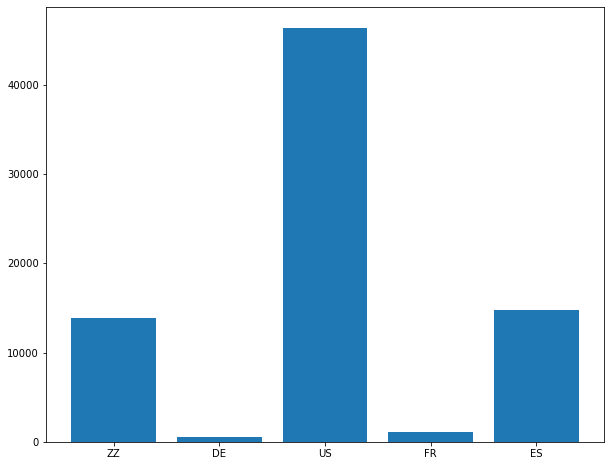

In [11]:
plt.bar(ips2['pais'],ips2['count'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

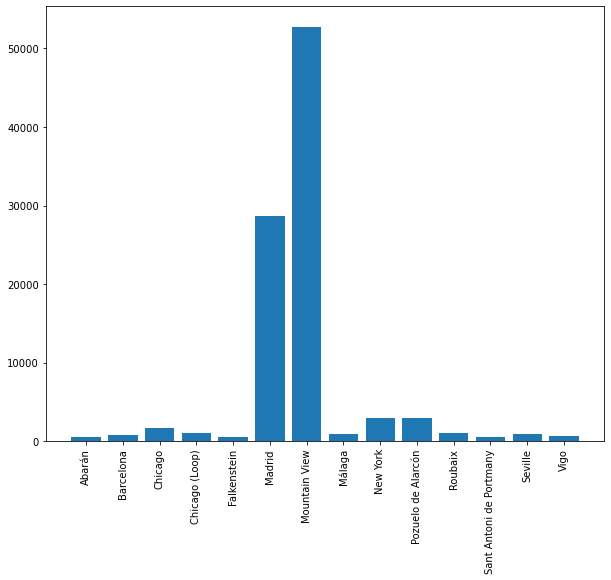

In [12]:
ciutats=ips2.groupby('ciutat')['count'].sum().reset_index()
plt.bar(ciutats['ciutat'],ciutats['count'])
plt.xticks(rotation=90)